In [9]:
%matplotlib inline

## Python Image Processing

with python3, matplotlib, numpy, and Pillow

Image file from images/test.jpg


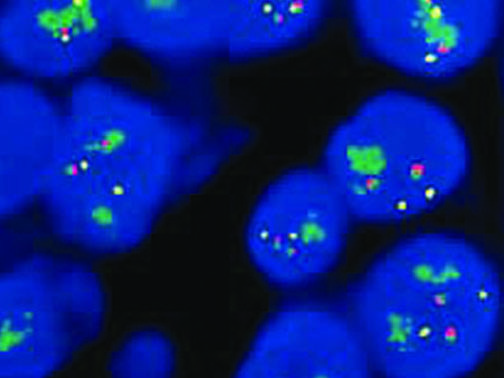

In [10]:
# Jupyter Notebook can open an image file from the file system

try:
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d.axes3d import Axes3D
    from PIL import Image
except ImportError:
    print('To run this notebook install matplotlib, and Pillow for python3')


from IPython.display import Image
print('Image file from images/test.jpg')

Image(filename='images/test.jpg')

In [1]:
import argparse
import colorsys

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d.axes3d import Axes3D
from PIL import Image


def rgb_spectrum(img, outfile=None, mono=False):

    """
    Create a multi-valued HSV Spectrum from an RGB

    Parameters:
    img - an opem image file of type PIL Image.Image
    outfile - optional output file name for saving the spectrial image produced
    mono - monochrome spectrum, or rgb spectrum

    Return:
    matplotlib.pyplot Object
    """
    if isinstance(img, Image.Image):
        # (2) Construct a blank matrix representing the pixels in the image
        print('Processing the image')
        print(img.mode)
        xs, ys = img.size
        max_intensity = 100
        hues = {}
        pixel_access = img.load()

        # (3) Examine each pixel in the image file
        for x in range(0, xs):
            for y in range(0, ys):
                # ( )  Get the RGB color of the pixels
                try:
                    [r, g, b, _] = pixel_access[x, y]
                except ValueError:
                    [r, g, b] = pixel_access[x, y]

                # ( )  Normalize pixel color values
                if mono:
                    single = max(r, g, b)
                    r = single / 255.0
                    g = single / 255.0
                    b = single / 255.0
                else:
                    r /= 255.0
                    g /= 255.0
                    b /= 255.0

                # ( )  Convert RGB color to HSV
                [h, s, v] = colorsys.rgb_to_hsv(r, g, b)

                if h not in hues:
                    hues[h] = {}
                if v not in hues[h]:
                    hues[h][v] = 1
                else:
                    if hues[h][v] < max_intensity:
                        hues[h][v] += 1

        # ( )   Decompose the hues tree into a set of dimensional arrays
        h_ = []
        v_ = []
        i = []
        colours = []

        for h in hues:
            for v in hues[h]:
                h_.append(h)
                v_.append(v)
                i.append(hues[h][v])
                [r, g, b] = colorsys.hsv_to_rgb(h, 1, v)
                colours.append([r, g, b])

        # ( )   Plot the graph!
        fig, ax = plt.subplots()

        if not mono:
            ax = Axes3D(fig)
            ax.scatter(h_, v_, i, s=5, c=colours, lw=0)
            ax.set_xlabel('Hue')
            ax.set_ylabel('Value')
            ax.set_zlabel('Intensity')
            ax.set_title('Multi-valued Spectrum')
        else:
            ax.scatter(v_, i, s=5, c=colours, lw=0)
            ax.set_xlabel('Value')
            ax.set_ylabel('Intensity')
            ax.set_title('Single-valued Spectrum')

        if outfile is not None:
            print('Saving spectral image to {}'.format(outfile))
            fig.savefig(fname=outfile, pad_inches=0.5)

        return plt


def get_bool(prompt, default=False):
    """Get a true or false answer from the user"""
    while True:
        try:
            return {"true":True,"false":False}[input(prompt).lower()]
        except KeyError as ex:
            print(ex)
            return default

    
def main():
    
    filename = input('image file name (try images/test.jpg): ')
    mono = get_bool('Generate Single Valued spectrum (true, false): ')
    
    print('Reading image: {}'.format(filename))
    image_file = Image.open(filename)

    plot = rgb_spectrum(image_file, mono=mono)

    plot.show()

image file name (try images/test.jpg): images/test.jpg
Generate Single Valued spectrum (true, false): 
''
Reading image: images/test.jpg
Processing the image
CMYK


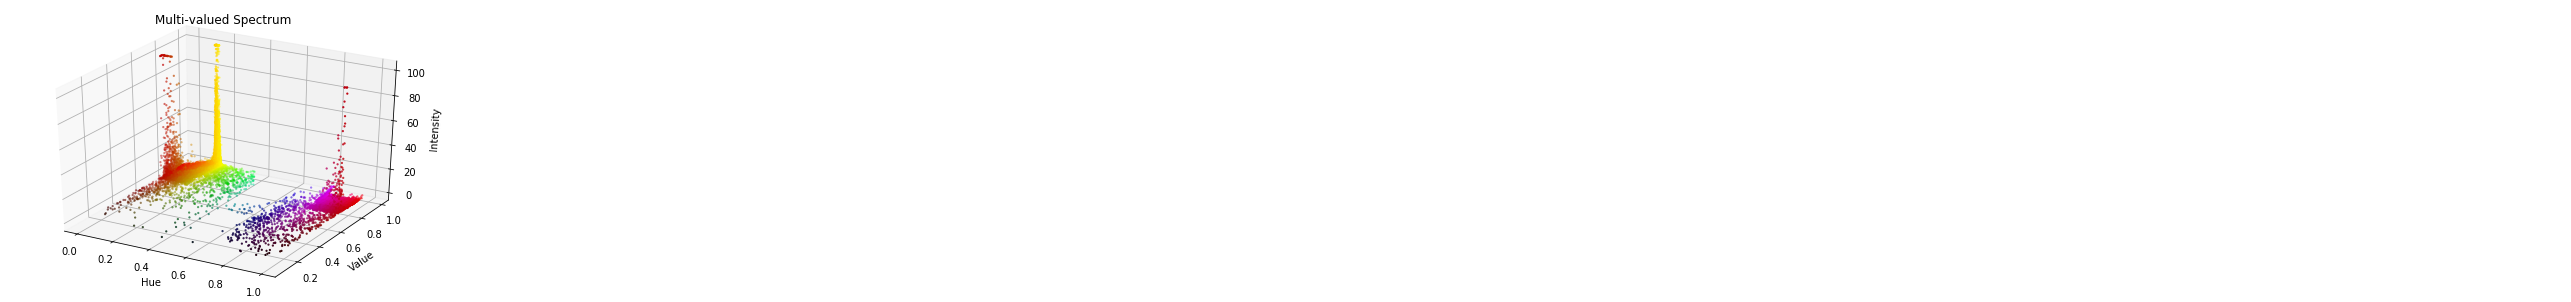

In [2]:
main()